In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import pandas as pd
import numpy as np

from scipy.signal import find_peaks
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


import matplotlib.pyplot as plt


from helpers import read_data
from helpers import select_data_interval
from helpers import get_entry_points
from helpers import get_peaks
from helpers import get_strokes
from helpers import get_exit_and_air_points
from helpers import indicators_calculator
from helpers import strokes_indicators

from bokeh.plotting import figure
# Make Bokeh Push push output to Jupyter Notebook.
from bokeh.io import push_notebook, show, output_notebook
from bokeh.resources import INLINE
from bokeh.models import LinearAxis, Range1d

output_notebook()

plt.style.use(['science', 'notebook', 'grid'])

Loading BokehJS ...

In [13]:
all_data = read_data("data/serie1.csv")
#data = select_data_interval(all_data, start=272, end=275)

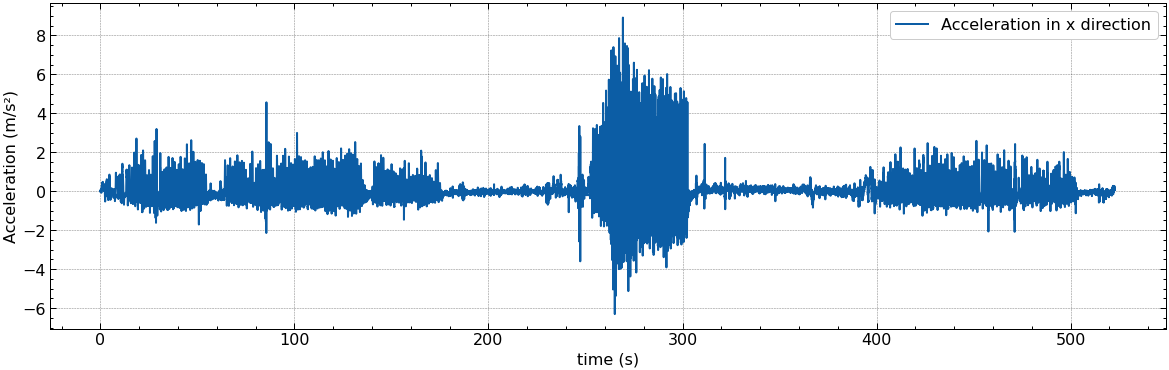

In [14]:
plt.figure(figsize=(20, 6))
plt.plot(all_data['time'], all_data.ax, label=r'Acceleration in x direction')
plt.xlabel('time (s)')
plt.ylabel(r'Acceleration (m/s²)')
plt.legend()
plt.show()

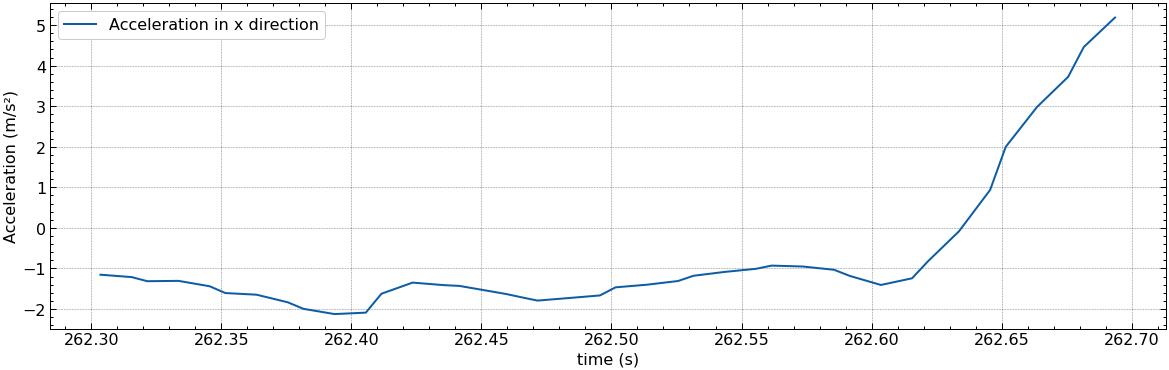

In [15]:
data = select_data_interval(all_data, start=262.3, end=262.7)
entry = get_entry_points(all_data)
peaks = get_peaks(all_data)
plt.figure(figsize=(20, 6))
#plt.scatter(entry['time'], entry.ax, label=r'Entry', color='red', lw=3)
plt.plot(data['time'], data.ax, label=r'Acceleration in x direction')
plt.xlabel('time (s)')
plt.ylabel(r'Acceleration (m/s²)')
plt.legend()
plt.show()

In [23]:
p = figure(title="AccZ", x_axis_label='time', y_axis_label='Acceleration', height = 200)

# Add a line renderer with legend and line thickness
p.line(all_data.time,all_data.ax, legend="AccZ", color='red')
p.circle(entry.time, entry.ax, legend='Entry', color='green')
p.circle(peaks.time, peaks.ax, legend='Peaks', color='black')
p.legend.click_policy="hide"
p.sizing_mode = "scale_width"
# Show the results
show(p)

In [17]:
data.isna().sum()
#data.shape

gx             0
gy             0
gz             0
ax             0
ay             0
az             0
roll           0
pitch          0
yaw            0
time_stamp     0
VideoRecord    0
DataRecord     0
time           0
dtype: int64

In [18]:
indicatos = strokes_indicators(data)
indicatos#[indicatos.isna()]

""


In [21]:
data.shape[0]/2

20.0

In [22]:
X_std = StandardScaler().fit_transform(indicatos)

ValueError: at least one array or dtype is required

In [ ]:
# Create a PCA instance: pca
pca = PCA(n_components=6)
principalComponents = pca.fit_transform(X_std)# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').